## Task 6.1 Linear Regression

T1-T5. Completed

T6. Using the features that you have created, implement a linear regression and a logistic re- gression model using gradient descent for stance classification. The implementations of these learning algorithms should be your own..

T7. Analyse the performance of your models using the test set. Describe the evaluation metric you use and explain why you think would be suited for this task. Feel free to use alternative metrics that you think may fit. Compare and contrast the performance of the two models you have implemented. Analyse the effect of learning rate on both models.

T8. Explore which features are the most important for the stance detection task by analysing their importance for the machine learning models you have built.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
#import the training set 
Pred_Train_features = pd.read_csv('/Users/weisihan/Downloads/fnc-1-master/final/Pred_Train_features.csv')
Pred_Test_features = pd.read_csv('/Users/weisihan/Downloads/fnc-1-master/final/Pred_Test_features.csv')

In [3]:
# Map Each Stance to a label
def agree_to_flag(stance):
    if stance == 'agree':
        return 1
    else:
        return -1

def disagree_to_flag(stance):
    if stance == 'disagree':
        return 1
    else:
        return -1
    
def discuss_to_flag(stance):
    if stance == 'discuss':
        return 1
    else:
        return -1
    
def unrelated_to_flag(stance):
    if stance == 'unrelated':
        return 1
    else:
        return -1
    
def stance_to_flag(stance):
    if stance == 'agree':
        return 1
    elif stance == 'disagree':
        return 2
    elif stance == 'discuss':
        return 3
    else:
        return 4

In [4]:
Pred_Train_features['y1'] = Pred_Train_features['Stance'].map(agree_to_flag)
Pred_Train_features['y2'] = Pred_Train_features['Stance'].map(disagree_to_flag)
Pred_Train_features['y3'] = Pred_Train_features['Stance'].map(discuss_to_flag)
Pred_Train_features['y4'] = Pred_Train_features['Stance'].map(unrelated_to_flag)
Pred_Train_features['y'] = Pred_Train_features['Stance'].map(stance_to_flag)

Pred_Test_features['y1'] = Pred_Test_features['Stance'].map(agree_to_flag)
Pred_Test_features['y2'] = Pred_Test_features['Stance'].map(disagree_to_flag)
Pred_Test_features['y3'] = Pred_Test_features['Stance'].map(discuss_to_flag)
Pred_Test_features['y4'] = Pred_Test_features['Stance'].map(unrelated_to_flag)
Pred_Test_features['y'] = Pred_Test_features['Stance'].map(stance_to_flag)

In [5]:
Pred_Train_features.head(2)

,Headline,Body_ID,articleBody,Stance,cos_sim_w2v,cos_sim_tfidf,overlap,polar_h,polar_b,P_Cor_Coe_w2c,P_Cor_Coe_tfidf,Euc_distance_w2c,Euc_distance_tfidf,kl_dis,LM_kld,y1,y2,y3,y4,y
0,police find mass graf least body near mexico t...,712,danny boyle directing untitled film seth rogen...,unrelated,-0.243617,-2.220446e-16,0.000000,0,0,-0.234044,-0.001445,1.577097,1.117929,118.890038,2.200789,-1,-1,-1,1,4
1,seth rogen play apple steve wozniak,712,danny boyle directing untitled film seth rogen...,discuss,0.851035,3.301286e-01,0.065217,0,0,0.849136,0.329755,0.545830,1.447857,8.457826,0.401247,-1,-1,1,-1,3


In [6]:
Pred_Train_features.columns.get_values()

array(['Headline', 'Body_ID', 'articleBody', 'Stance', 'cos_sim_w2v',
       'cos_sim_tfidf', 'overlap', 'polar_h', 'polar_b', 'P_Cor_Coe_w2c',
       'P_Cor_Coe_tfidf', 'Euc_distance_w2c', 'Euc_distance_tfidf',
       'kl_dis', 'LM_kld', 'y1', 'y2', 'y3', 'y4', 'y'], dtype=object)

In [7]:
Pred_Test_features.columns.get_values()

array(['Headline', 'Body_ID', 'articleBody', 'Stance', 'cos_sim_tfidf',
       'cos_sim_w2v', 'overlap', 'polar_h', 'polar_b', 'P_Cor_Coe_w2c',
       'P_Cor_Coe_tfidf', 'Euc_distance_w2c', 'Euc_distance_tfidf',
       'kl_dis', 'LM_kld', 'y1', 'y2', 'y3', 'y4', 'y'], dtype=object)

In [173]:
Pred_Train_features.shape

(49972, 20)

In [8]:
from sklearn.cross_validation import train_test_split
def trts_split(df):
    tts_df = df.copy()
    X = tts_df[['Headline', 'Body_ID', 'articleBody', 'cos_sim_w2v',
       'cos_sim_tfidf', 'overlap', 'polar_h', 'polar_b', 'P_Cor_Coe_w2c',
       'P_Cor_Coe_tfidf', 'Euc_distance_w2c', 'Euc_distance_tfidf',
       'kl_dis', 'LM_kld','y1','y2','y3','y4','y']]
    y = tts_df['Stance']
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=123)
    Xy_train = pd.concat([X_train,y_train],axis=1)
    Xy_valid = pd.concat([X_valid,y_valid],axis=1)
    return  Xy_train, Xy_valid

/Users/weisihan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
All_agree = Pred_Train_features[Pred_Train_features['Stance']=='agree']
All_disagree = Pred_Train_features[Pred_Train_features['Stance']=='disagree']
All_discuss = Pred_Train_features[Pred_Train_features['Stance']=='discuss']
All_unrelated = Pred_Train_features[Pred_Train_features['Stance']=='unrelated']

In [10]:
Train_df_agree, Valid_df_agree = trts_split(All_agree)
Train_df_disagree, Valid_df_disagree = trts_split(All_disagree)
Train_df_discuss, Valid_df_discuss = trts_split(All_discuss)
Train_df_unrelated, Valid_df_unrelated = trts_split(All_unrelated)

Train_set = pd.concat([Train_df_agree,Train_df_disagree,Train_df_discuss,Train_df_unrelated])
Valid_set = pd.concat([Valid_df_agree,Valid_df_disagree,Valid_df_discuss,Valid_df_unrelated])
print(Train_set.count(),Valid_set.count())

Headline              44974
Body_ID               44974
articleBody           44974
cos_sim_w2v           44974
cos_sim_tfidf         44974
overlap               44974
polar_h               44974
polar_b               44974
P_Cor_Coe_w2c         44974
P_Cor_Coe_tfidf       44974
Euc_distance_w2c      44974
Euc_distance_tfidf    44974
kl_dis                44974
LM_kld                44974
y1                    44974
y2                    44974
y3                    44974
y4                    44974
y                     44974
Stance                44974
dtype: int64 Headline              4998
Body_ID               4998
articleBody           4998
cos_sim_w2v           4998
cos_sim_tfidf         4998
overlap               4998
polar_h               4998
polar_b               4998
P_Cor_Coe_w2c         4998
P_Cor_Coe_tfidf       4998
Euc_distance_w2c      4998
Euc_distance_tfidf    4998
kl_dis                4998
LM_kld                4998
y1                    4998
y2                    

In [11]:
Valid_set.shape

(4998, 20)

In [12]:
Train_set.shape

(44974, 20)

In [116]:
#Select Training Features. I would like to use cos_sim_tfidf, overlap, P_Cor_Coe_tfidf, polar_h, polar_b to tring the model
X_train =  Train_set[['cos_sim_tfidf','overlap','P_Cor_Coe_tfidf','Euc_distance_tfidf','LM_kld']]
X_valid = Valid_set[['cos_sim_tfidf','overlap','P_Cor_Coe_tfidf','Euc_distance_tfidf','LM_kld']]
X_test = Pred_Test_features[['cos_sim_tfidf','overlap','P_Cor_Coe_tfidf','Euc_distance_tfidf','LM_kld']]

In [117]:
def normalisation(data):
    col=['cos_sim_tfidf','overlap','P_Cor_Coe_tfidf','Euc_distance_tfidf','LM_kld']
    df=data.copy()
    for c in col:
        df[c]=(df[c]-df[c].mean())/df[c].std()
    return df


In [118]:
X_train=normalisation(X_train)
X_valid=normalisation(X_valid)
X_test=normalisation(X_test)

In [119]:
X_train.head()

,cos_sim_tfidf,overlap,P_Cor_Coe_tfidf,Euc_distance_tfidf,LM_kld
21984,2.152899,1.258843,2.152338,-1.395411,-1.280838
37301,1.650132,0.361987,1.650000,0.506798,-1.574915
43316,1.379746,0.403715,1.380062,-0.150166,-0.938676
31986,2.531044,0.024469,2.534597,-0.481756,-2.032725
39781,1.140260,0.227124,1.140252,0.510099,-0.550300


In [120]:
m = len(X_train)

x0 = np.ones(m)
#cos_sim_tfidf=Train_set['cos_sim_tfidf'].values
#overlap=Train_set['overlap'].values
#P_Cor_Coe_tfidf=Train_set['P_Cor_Coe_tfidf'].values

X = X_train.copy()
X['x0']=x0
X = X[['x0','cos_sim_tfidf','overlap','P_Cor_Coe_tfidf','Euc_distance_tfidf','LM_kld']]
# Initialise Coefficients
B1 = np.array([0, 0, 0, 0, 0, 0])
B2 = np.array([0, 0, 0, 0, 0, 0])
B3 = np.array([0, 0, 0, 0, 0, 0])
B4 = np.array([0, 0, 0, 0, 0, 0])
# Define Y of Four Stance 
Y1 = np.array(Train_set['y1'].values)
Y2 = np.array(Train_set['y2'].values)
Y3 = np.array(Train_set['y3'].values)
Y4 = np.array(Train_set['y4'].values)
alpha = 0.5

In [121]:
X.head()

,x0,cos_sim_tfidf,overlap,P_Cor_Coe_tfidf,Euc_distance_tfidf,LM_kld
21984,1.0,2.152899,1.258843,2.152338,-1.395411,-1.280838
37301,1.0,1.650132,0.361987,1.650000,0.506798,-1.574915
43316,1.0,1.379746,0.403715,1.380062,-0.150166,-0.938676
31986,1.0,2.531044,0.024469,2.534597,-0.481756,-2.032725
39781,1.0,1.140260,0.227124,1.140252,0.510099,-0.550300


In [122]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/( 2* m)
    return J

def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [123]:
cost_function(X, Y1, B1)

0.5

In [124]:
#19:46
newB1, cost_history1 = gradient_descent(X, Y1, B1, alpha, 20000)
newB2, cost_history2 = gradient_descent(X, Y2, B2, alpha, 20000)
newB3, cost_history3 = gradient_descent(X, Y3, B3, alpha, 20000)
newB4, cost_history4 = gradient_descent(X, Y4, B4, alpha, 20000)

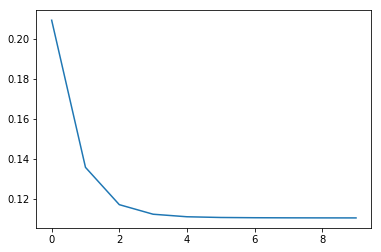

In [157]:
plt.plot(cost_history1[0:10])

In [130]:
print(cost_history1[-1],cost_history2[-1],cost_history3[-1],cost_history4[-1])

0.110532073475 0.0319763136372 0.165291752997 0.0981376739077


In [132]:
#Final Weight for Agree classifier
newB1

x0                   -0.852804
cos_sim_tfidf         0.309108
overlap               0.027800
P_Cor_Coe_tfidf      -0.093971
Euc_distance_tfidf    0.055790
LM_kld               -0.000376
dtype: float64

In [133]:
#Final Weight for Disagree classifier
newB2

x0                   -0.966381
cos_sim_tfidf         0.032298
overlap              -0.007607
P_Cor_Coe_tfidf       0.019401
Euc_distance_tfidf    0.011230
LM_kld               -0.000716
dtype: float64

In [134]:
#Final Weight for Discuss classifier
newB3

x0                   -0.643438
cos_sim_tfidf        -0.573539
overlap               0.020849
P_Cor_Coe_tfidf       0.977776
Euc_distance_tfidf   -0.046998
LM_kld               -0.107907
dtype: float64

In [135]:
#Final Weight for Unrelated classifier
newB4

x0                    0.462623
cos_sim_tfidf         0.232134
overlap              -0.041042
P_Cor_Coe_tfidf      -0.903206
Euc_distance_tfidf   -0.020022
LM_kld                0.108999
dtype: float64

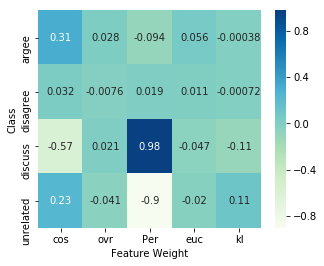

In [171]:
#Plot Weight Heatmap Matrix
np.matrix([newB1,newB2,newB3,newB4])

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(np.matrix([newB1[1:],newB2[1:],newB3[1:],newB4[1:]]), annot=True, xticklabels=['cos', 'ovr', 'Per','euc','kl'], yticklabels=['argee', 'disagree', 'discuss','unrelated']#
           ,cmap='GnBu' )

plt.ylabel('Class')
plt.xlabel('Feature Weight')
plt.show()

### Test and Evaluation 

In [146]:
 
def evaluation (Y_pagree,Y_pdisagree,Y_pdiscuss,Y_punrelated,Y_real):

    matrix=np.matrix([Y_pagree, Y_pdisagree, Y_pdiscuss, Y_punrelated]).T
    matrix=np.abs(matrix-1)
    minind=np.argmin(matrix , axis=1)

    pred_result=[]
    for i in range(minind.shape[0]):
        pred_result.append(minind[i].item()+1)

    real_result=Y_real
    
    correct=0
    for i in range(len(Y_real)):
        if pred_result[i]==real_result[i]:
            correct=correct+1
        
    accuracy = correct/len(Y_real)
    print("The accuracy is: ",accuracy)

    from sklearn.metrics import confusion_matrix 
    confusion_matrix = confusion_matrix(real_result, pred_result)
    print("The confusion matrix is: ")
    print(confusion_matrix)

    from sklearn.metrics import classification_report
    target_names = ['agree', 'disagree', 'discuss', 'unrelated']
    print(classification_report(real_result, pred_result,  target_names=target_names))


    fig, ax = plt.subplots(figsize=(5,4))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', xticklabels=['argee', 'disagree', 'discuss','unrelated'], yticklabels=['argee', 'disagree', 'discuss','unrelated']#
           ,cmap='GnBu' )
    
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    


"""correct=0
agree_correct=0
disagree_correct=0
discuss_correct=0
unrelated_correct=0

for i in range(len(real_result)):
    if pred_result[i]==real_result[i]:
        correct=correct+1
        if pred_result[i]==1:
            agree_correct=agree_correct+1
        elif pred_result[i]==2:
            disagree_correct=disagree_correct+1
        elif pred_result[i]==3:
            discuss_correct=discuss_correct+1
        else:
            unrelated_correct=unrelated_correct+1
            
"""
        



'correct=0\nagree_correct=0\ndisagree_correct=0\ndiscuss_correct=0\nunrelated_correct=0\n\nfor i in range(len(real_result)):\n   if pred_result[i]==real_result[i]:\n       correct=correct+1\n       if pred_result[i]==1:\n           agree_correct=agree_correct+1\n       elif pred_result[i]==2:\n           disagree_correct=disagree_correct+1\n       elif pred_result[i]==3:\n           discuss_correct=discuss_correct+1\n       else:\n           unrelated_correct=unrelated_correct+1\n           \n'

#### Test on the Validation Set

In [138]:
X_v = X_valid.copy()
X_v['x0']=1
X_v = X_v[['x0','cos_sim_tfidf','overlap','P_Cor_Coe_tfidf','Euc_distance_tfidf','LM_kld']]

# Define Y of Four Stance 
Y1_v = np.array(Valid_set['y1'].values)
Y2_v = np.array(Valid_set['y2'].values)
Y3_v = np.array(Valid_set['y3'].values)
Y4_v = np.array(Valid_set['y4'].values)

In [139]:
Y_pred1_v = X_v.dot(newB1)
Y_pred2_v = X_v.dot(newB2)
Y_pred3_v = X_v.dot(newB3)
Y_pred4_v = X_v.dot(newB4)

The accuracy is:  0.8589435774309724
The confusion matrix is: 
[[   1    0  268   99]
 [   0    0   67   17]
 [   1    0  640  250]
 [   0    0    3 3652]]
             precision    recall  f1-score   support

      agree       0.50      0.00      0.01       368
   disagree       0.00      0.00      0.00        84
    discuss       0.65      0.72      0.68       891
  unrelated       0.91      1.00      0.95      3655

avg / total       0.82      0.86      0.82      4998



/Users/weisihan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


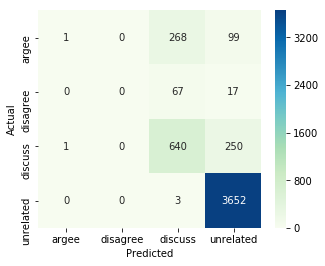

In [147]:
evaluation(Y_pred1_v,Y_pred2_v,Y_pred3_v,Y_pred4_v, list(Valid_set['y']))

#### Test on the Test Set

In [141]:
X_t = X_test.copy()
X_t['x0']=1
X_t = X_t[['x0','cos_sim_tfidf','overlap','P_Cor_Coe_tfidf','Euc_distance_tfidf','LM_kld']]

# Define Y of Four Stance 
Y1_t = np.array(Pred_Test_features['y1'].values)
Y2_t = np.array(Pred_Test_features['y2'].values)
Y3_t = np.array(Pred_Test_features['y3'].values)
Y4_t = np.array(Pred_Test_features['y4'].values)

In [142]:
Y_pred1_t = X_t.dot(newB1)
Y_pred2_t = X_t.dot(newB2)
Y_pred3_t = X_t.dot(newB3)
Y_pred4_t = X_t.dot(newB4)

The accuracy is:  0.8450005902490851
The confusion matrix is: 
[[    3     0  1400   500]
 [    0     0   398   299]
 [    9     0  3150  1305]
 [    0     0    28 18321]]
             precision    recall  f1-score   support

      agree       0.25      0.00      0.00      1903
   disagree       0.00      0.00      0.00       697
    discuss       0.63      0.71      0.67      4464
  unrelated       0.90      1.00      0.95     18349

avg / total       0.78      0.85      0.80     25413



/Users/weisihan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


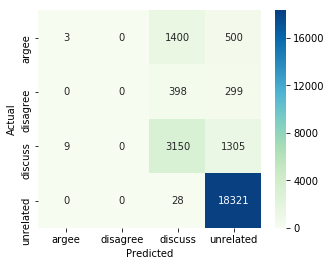

In [148]:
evaluation(Y_pred1_t,Y_pred2_t,Y_pred3_t,Y_pred4_t, list(Pred_Test_features['y']))